### Which company size is most likely to hire for a specific role in all industries?

In [67]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:

# Load all datasets
posting_df = pd.read_csv('posting.csv')
company_df = pd.read_csv('companies/companies_cleaned.csv')

In [70]:
company_df.rename(columns={'name': 'company_name'}, inplace=True)
company_df.head()

,company_id,company_name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture


In [71]:
# Merge job postings with company data
posting_company = posting_df.merge(company_df[['company_id', 'company_name', 'company_size']], 
                                   on='company_id', how='inner')

In [72]:
posting_company

,company_name_x,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,formatted_work_type,...,application_url,application_type,formatted_experience_level,skills_desc,posting_domain,work_type,currency,compensation_type,company_name_y,company_size
0,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,25.5,17.0,Full-time,...,NaN,ComplexOnsiteApply,NaN,Requirements: \n\nWe are seeking a College or ...,NaN,FULL_TIME,USD,BASE_SALARY,Corcoran Sawyer Smith,2.0
1,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,25.5,45000.0,Full-time,...,NaN,ComplexOnsiteApply,NaN,We are currently accepting resumes for FOH - A...,NaN,FULL_TIME,USD,BASE_SALARY,The National Exemplar,1.0
2,The National Exemplar,Executive Chef / Kitchen Manager,Company DescriptionThe National Exemplar is a ...,85000.0,YEARLY,"Cincinnati, OH",64896719.0,25.5,55000.0,Full-time,...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,FULL_TIME,USD,BASE_SALARY,The National Exemplar,1.0
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,25.5,140000.0,Full-time,...,NaN,ComplexOnsiteApply,NaN,This position requires a baseline understandin...,NaN,FULL_TIME,USD,BASE_SALARY,"Abrams Fensterman, LLP",2.0
4,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,25.5,14.0,Internship,...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,INTERNSHIP,USD,BASE_SALARY,Downtown Raleigh Alliance,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116265,pepperl+fuchs,Account Manager,Are you looking for a career that allows you t...,80000.0,YEARLY,"Milwaukee, WI",1120218.0,25.5,60000.0,Full-time,...,NaN,ComplexOnsiteApply,Mid-Senior level,NaN,NaN,FULL_TIME,USD,BASE_SALARY,pepperl+fuchs,5.0
116266,Maranatha Christian Academy,Lead Preschool Teacher,"In search of someone to be a full time, Lead P...",80000.0,YEARLY,"Oakwood, GA",9641086.0,25.5,60000.0,Full-time,...,NaN,SimpleOnsiteApply,NaN,NaN,NaN,FULL_TIME,USD,BASE_SALARY,Maranatha Christian Academy,1.0
116267,The Dyrt,Senior Frontend/App Developer,The Dyrt is the largest digital camping platfo...,80000.0,YEARLY,United States,6404239.0,25.5,60000.0,Full-time,...,https://the-dyrt.breezy.hr/p/31c6745b3473-seni...,OffsiteApply,Mid-Senior level,NaN,NaN,FULL_TIME,USD,BASE_SALARY,The Dyrt,1.0
116268,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,80000.0,YEARLY,"Spokane, WA",90552133.0,25.5,60000.0,Full-time,...,https://epsoperations.bamboohr.com/careers/122...,OffsiteApply,Mid-Senior level,NaN,epsoperations.bamboohr.com,FULL_TIME,USD,BASE_SALARY,EPS Learning,2.0


In [73]:
posting_company.isnull().sum()

company_name_x                     0
title                              0
description                        3
max_salary                         0
pay_period                         0
location                           0
company_id                         0
med_salary                         0
min_salary                         0
formatted_work_type                0
job_posting_url                    0
application_url                30874
application_type                   0
formatted_experience_level     25354
skills_desc                   114129
posting_domain                 33732
work_type                          0
currency                           0
compensation_type                  0
company_name_y                     0
company_size                       0
dtype: int64

we drop the unnecessay columns 

In [74]:
posting_company.drop(columns= ['posting_domain','skills_desc','formatted_experience_level','application_url'], inplace=True)

In [75]:
posting_company

,company_name_x,title,description,max_salary,pay_period,location,company_id,med_salary,min_salary,formatted_work_type,job_posting_url,application_type,work_type,currency,compensation_type,company_name_y,company_size
0,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,25.5,17.0,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,Corcoran Sawyer Smith,2.0
1,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,25.5,45000.0,Full-time,https://www.linkedin.com/jobs/view/10998357/?t...,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,The National Exemplar,1.0
2,The National Exemplar,Executive Chef / Kitchen Manager,Company DescriptionThe National Exemplar is a ...,85000.0,YEARLY,"Cincinnati, OH",64896719.0,25.5,55000.0,Full-time,https://www.linkedin.com/jobs/view/3899530060/...,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,The National Exemplar,1.0
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,25.5,140000.0,Full-time,https://www.linkedin.com/jobs/view/23221523/?t...,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,"Abrams Fensterman, LLP",2.0
4,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,25.5,14.0,Internship,https://www.linkedin.com/jobs/view/91700727/?t...,ComplexOnsiteApply,INTERNSHIP,USD,BASE_SALARY,Downtown Raleigh Alliance,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116265,pepperl+fuchs,Account Manager,Are you looking for a career that allows you t...,80000.0,YEARLY,"Milwaukee, WI",1120218.0,25.5,60000.0,Full-time,https://www.linkedin.com/jobs/view/3906265319/...,ComplexOnsiteApply,FULL_TIME,USD,BASE_SALARY,pepperl+fuchs,5.0
116266,Maranatha Christian Academy,Lead Preschool Teacher,"In search of someone to be a full time, Lead P...",80000.0,YEARLY,"Oakwood, GA",9641086.0,25.5,60000.0,Full-time,https://www.linkedin.com/jobs/view/3906266100/...,SimpleOnsiteApply,FULL_TIME,USD,BASE_SALARY,Maranatha Christian Academy,1.0
116267,The Dyrt,Senior Frontend/App Developer,The Dyrt is the largest digital camping platfo...,80000.0,YEARLY,United States,6404239.0,25.5,60000.0,Full-time,https://www.linkedin.com/jobs/view/3906266217/...,OffsiteApply,FULL_TIME,USD,BASE_SALARY,The Dyrt,1.0
116268,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,80000.0,YEARLY,"Spokane, WA",90552133.0,25.5,60000.0,Full-time,https://www.linkedin.com/jobs/view/3906267131/...,OffsiteApply,FULL_TIME,USD,BASE_SALARY,EPS Learning,2.0


In [88]:
print(posting_company['title'].unique)

<bound method Series.unique of 0                                     Marketing Coordinator
1                               Assitant Restaurant Manager
2                          Executive Chef / Kitchen Manager
3         Senior Elder Law / Trusts and Estates Associat...
4                  Economic Development and Planning Intern
                                ...                        
116265                                      Account Manager
116266                               Lead Preschool Teacher
116267                        Senior Frontend/App Developer
116268                 Account Executive, Oregon/Washington
116269                         Business Development Manager
Name: title, Length: 116270, dtype: object>


We suspect a class imbalance in the company sizes but we need to prove it

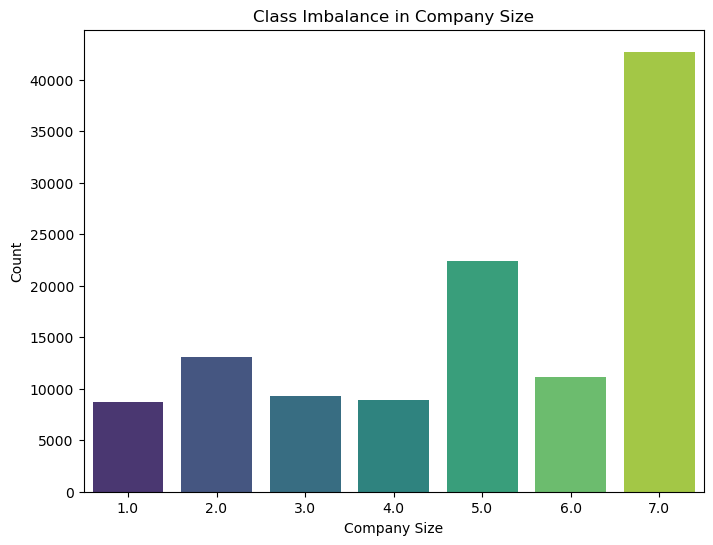

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(data=posting_company, x='company_size', palette='viridis')
plt.title('Class Imbalance in Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

As we can see there's a clear imbalance specially in the '7' and '5' categories

/Users/marouane/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


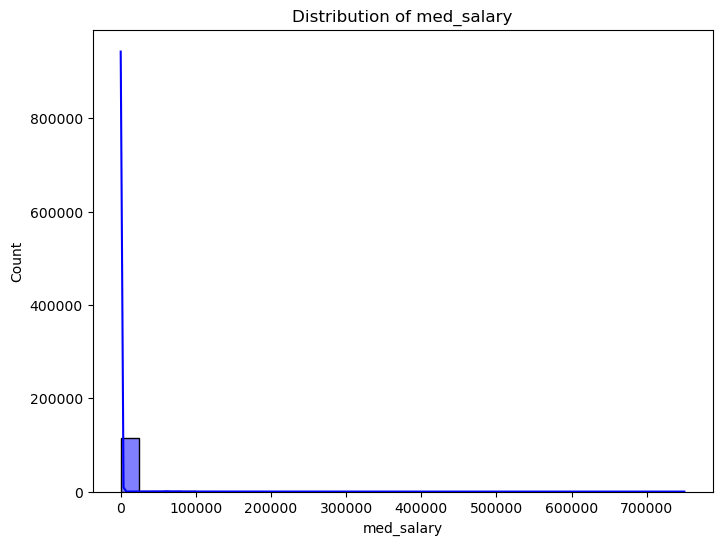

/Users/marouane/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


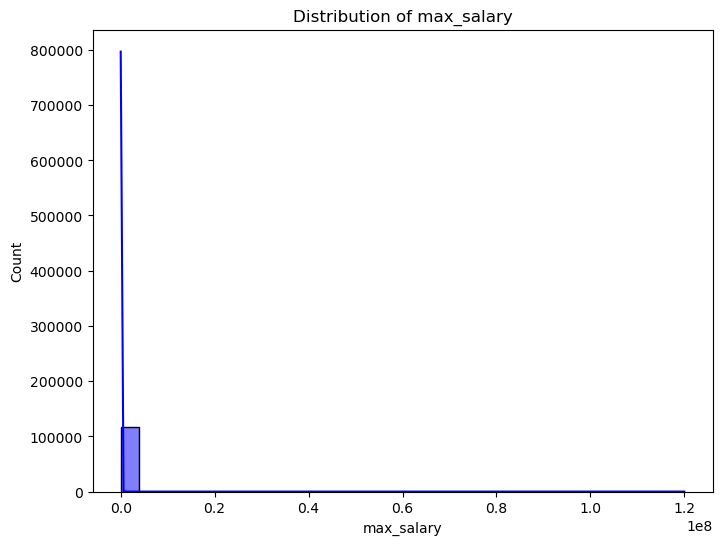

In [78]:
numerical_features = ['med_salary', 'max_salary']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(posting_company[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

We will write the a function that should run anytime we are looking for a specific job and would run the model

In [79]:
def predict_company_size_for_role(posting_company, role):

    
    posting_company_filtered = posting_company[posting_company['title'].str.contains(role, na=False)]

    if posting_company_filtered.empty:
        print(f"No data found for the role: {role}")
        return

    features = ['formatted_work_type', 'med_salary', 'max_salary', 'company_name_x','location']
    X = posting_company_filtered[features]
    y = posting_company_filtered['company_size']

    X = pd.get_dummies(X, drop_first=True)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train_smote, y_train_smote)

    #  Evaluate the model
    y_pred = model.predict(X_test)
    print(f"Results for role: {role}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Step 9: Predict the likelihood of each company size
    company_size_probabilities = model.predict_proba(X_test).mean(axis=0)  # Average probabilities across the test set
    company_size_labels = model.classes_

    # Identify the company size with the highest likelihood
    most_likely_company_size = company_size_labels[company_size_probabilities.argmax()]
    print(f"\nThe company size most likely to hire for the role '{role}' is: {most_likely_company_size}")


In [92]:
role_input = input("Enter the job role you want to analyze: ")
predict_company_size_for_role(posting_company, role_input)

Results for role: Software Developer
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2
         4.0       1.00      0.50      0.67         2
         5.0       1.00      0.20      0.33         5
         6.0       0.79      1.00      0.88        11
         7.0       0.33      0.80      0.47         5

    accuracy                           0.61        28
   macro avg       0.52      0.42      0.39        28
weighted avg       0.62      0.61      0.54        28

Confusion Matrix:
[[ 0  0  0  0  1  2]
 [ 0  0  0  0  0  2]
 [ 0  0  1  0  1  0]
 [ 0  0  0  1  0  4]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  1  4]]

The company size most likely to hire for the role 'Software Developer' is: 6.0


/Users/marouane/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/marouane/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marouane/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marouane/anaconda3/lib/python